# Reinforcement Learning Notebook
## Introduction to Q-Learning Algorithm
the following notebook is based on the following deep reinforcement learning code:
* https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/Taxi-v2/Q%20Learning%20with%20OpenAI%20Taxi-v2%20video%20version.ipynb

## n-Chain environment (OpenAI Gym)
Official documentation: https://gym.openai.com/envs/NChain-v0/

This game presents moves along a linear chain of states, with two actions:
* action 0 = move forward along the chain, but get no reward 
* action 1 = move backward to state 0, get small reward of 2

The end of the chain, however, presents a large reward of 10, and by moving 'forward' at the end of the chain this large reward can be repeated.

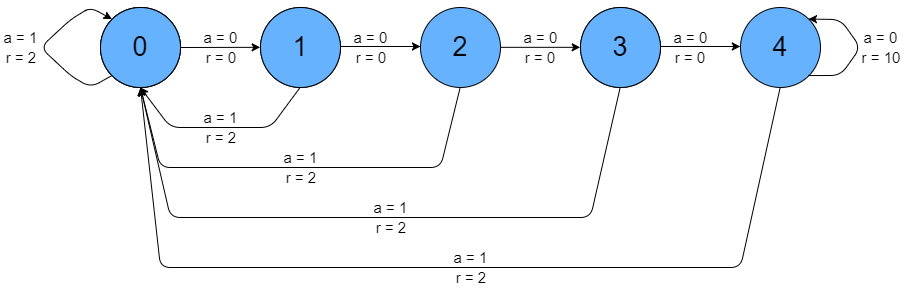

In [1]:
from IPython.display import Image
Image(filename = 'NChain-illustration.png', width=1000, height=100)
# Image taken from:
# https://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/

In [2]:
# first we have to install the gym module, which contains the NChain environment
!pip install gym

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import gym
from gym import spaces

import sys
import warnings
import time

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
# initialize the nchain environment
env = gym.make('NChain-v0')

In [5]:
# get 10 randomly sampled actions
[env.action_space.sample() for ii in range(10)]

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [6]:
# define the class which consists the q-learning algorithm
class QClass(object):
    
    def __init__(self, name): 
        """initialize the class"""
        self.name = name
        
        self.env = gym.make('NChain-v0')
        self.env.env.slip = 0
        state = self.env.reset()
        
        # initalize the Q-table
        self.qtable = self.result = np.ones((self.env.observation_space.n, self.env.action_space.n))
        self.epsilon = max_epsilon
        
        
    # define the q learning algorithm
    def q_learning_algorithm(self, plot = False, max_steps = 10, total_episodes = 1000, total_test_episodes = 50):
        """define the q-learning algorithm, here the q-table values are calculated"""

        # create placeholder to store the results
        self.episode_rewards = np.zeros(total_episodes) 
        self.episode_epsilon = np.zeros(total_episodes)
        self.episode_last_state = np.zeros(total_episodes)
        
        start = time.time()
        # loop over all episodes
        for episode_i in range(total_episodes):
            # initalize the environment
            state = self.env.reset()
            
            # for each episode loop over the max number of steps that are possible
            for step in range(max_steps):    
                # randomly explore and exploit
                if random.uniform(0,1) >= self.epsilon:
                    # exploitation, max value for given state
                    action = np.argmax(self.qtable[state, :])
                else:
                    # exploration, random choice
                    action = self.env.action_space.sample()

                # take an action and observe the outcome state (new_state), reward and stopping criterion
                new_state, reward, done, _ = self.env.step(action)
                # update q Table 
                self.qtable[state, action] = self.update_qtable(state, new_state, action, reward)
                # assign the new state
                state = new_state
                # update the reward
                self.episode_rewards[episode_i] += reward            
                # stack results
                self.result = np.dstack((self.result, self.qtable))
                # check stopping criterion
                if done == True:
                    break
            
            self.episode_rewards[episode_i] /= step # average the reward
            self.episode_last_state[episode_i] = state # average the reward
            
            # reduce epsilon, for exploration-exploitation tradeoff
            self.epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode_i)
            self.episode_epsilon[episode_i] = self.epsilon
            
            if episode_i % 100 == 0 and plot:
                print('episode', episode_i)
                print('-elapsed time [min]: ' , round( (time.time() - start)/60, 1))

            
    def update_qtable(self, state, new_state, action, reward):
        # Q(s,a) = Q(s,a) + lr  * [R(s,a) + gamma * max Q(s',a') - Q (s,a)]
        return self.qtable[state,action] + learning_rate * \
                          (reward + gamma * np.max(self.qtable[new_state, :]) - self.qtable[state, action])

In [7]:
def visualize_episodes(*cases):
    plt.figure(figsize=(10,15))
    colour = ['orange', 'm','b','k','g']
    
    plt.subplot(3,1,1)
    plt.title('Reward over time per episode')
    for i, case in enumerate(cases):
        plt.plot(case.episode_rewards, c = colour[i], label = case.name, 
                 linewidth = 1, linestyle = '-', alpha = 0.7)
    plt.xlabel('# episodes')
    plt.ylabel('Reward')
    plt.grid()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    
    plt.subplot(3,1,2)
    plt.title('Exploration parameter epsilon per episode')
    for i, case in enumerate(cases):
        plt.plot(case.episode_epsilon, c = colour[i], label = case.name, 
                 linewidth = 1, linestyle = '-', alpha = 0.7)
    plt.xlabel('# episodes')
    plt.ylabel('Epsilon')
    plt.grid()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)  
    
    plt.subplot(3,1,3)
    plt.title('Last state the agent is standing on at the end of the episode')
    for i, case in enumerate(cases):
        plt.plot(case.episode_last_state, c = colour[i], label = case.name, 
                 linewidth = 1, linestyle = '-', alpha = 0.7)
    plt.xlabel('# episodes')
    plt.ylabel('state number')
    plt.grid()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)  
    plt.tight_layout()
    plt.show()
    

In [8]:
### case1
name = 'case1, the agent explores and takes future rewards into account'

# q-learning parameters
learning_rate = 0.8 
gamma = 0.9 # gamma = 1, we care about all future rewards equally as the current one  
            # gamma = 0, we only care about the current reward)

# exploration parameters
max_epsilon = 1
min_epsilon = 0.0
decay_rate = 0.008 # smaller decay rate, more exploration

qClass1 = QClass(name)
qClass1.q_learning_algorithm()

In [9]:
### case2
name = 'case2, the agent cares only about immediate rewards (small gamma)'
# q-learning parameters
learning_rate = 0.8 
gamma = 0.01 # gamma = 1, we care about all future rewards equally as the current one  
            # gamma = 0, we only care about the current reward)

# exploration parameters
max_epsilon = .5
min_epsilon = 0.0
decay_rate = 0.008 # smaller decay rate, more exploration

qClass2 = QClass(name)
qClass2.q_learning_algorithm()


In [10]:
### case3
name = "case3, the agent doesn't explore the environment (small epsilon)"

# q-learning parameters
learning_rate = 0.8 
gamma = 0.9 # gamma = 1, we care about all future rewards equally as the current one  
            # gamma = 0, we only care about the current reward)

# exploration parameters
max_epsilon = 0.2
min_epsilon = 0
decay_rate = 0.5 # smaller decay rate, more exploration

qClass3 = QClass(name)
qClass3.q_learning_algorithm()

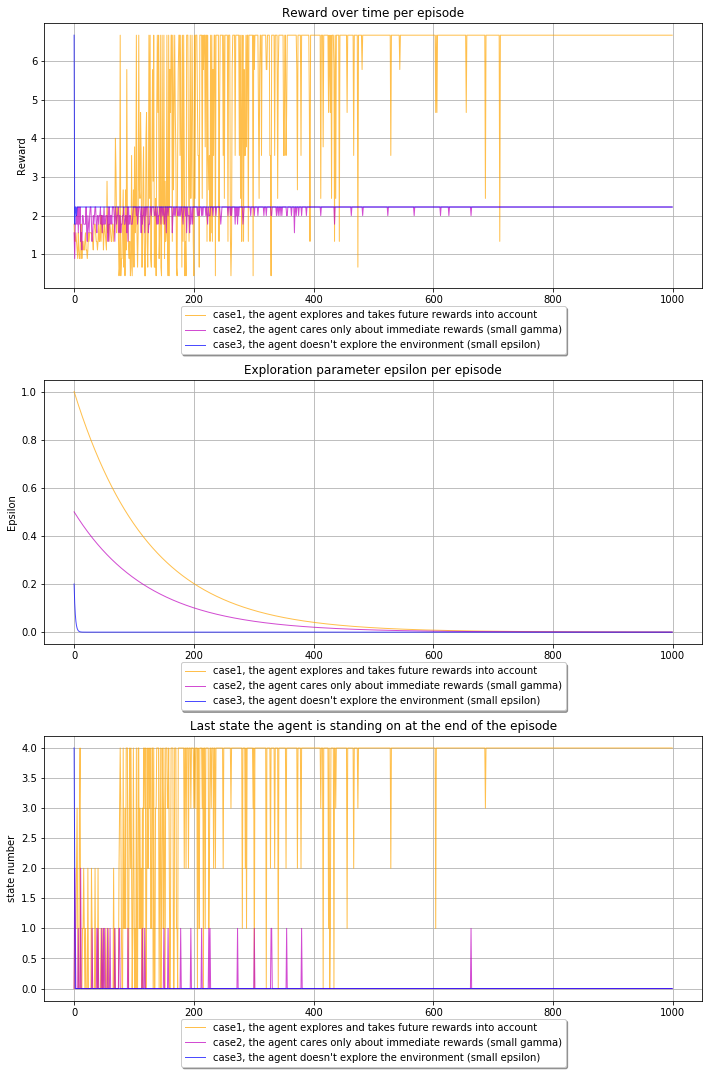

In [11]:
# visualize the different set of parameters
visualize_episodes(qClass1, qClass2, qClass3)

* y-axis: state 0 to state 4
* x-axis: action 0 and action 1
* action 0 = move forward, but get no reward (in the last state get large reward)
* action 1 = move backward to state 0, get small reward
### higher values mean higher future rewards for this specific action-state pair

In [12]:
print('case1\n', np.around(qClass1.qtable,1)) 
print('case2\n',np.around(qClass2.qtable,1))
print('case3\n',np.around(qClass3.qtable,1))

case1
 [[ 65.6  61. ]
 [ 72.9  61. ]
 [ 81.   61. ]
 [ 90.   61. ]
 [100.   61. ]]
case2
 [[0. 2.]
 [0. 2.]
 [0. 2.]
 [1. 2.]
 [1. 1.]]
case3
 [[ 0.9 20. ]
 [ 0.9 15.2]
 [ 0.9  1. ]
 [ 0.9  1. ]
 [40.   1. ]]


The q-table of case1 should have similar values like the following table:

|    ----   | Action 0  | Action 1 | 
| ------------- | ------------- | ------------- |
| state 0 | 65.61  | 61.049  |
| state 1 | 72.9  | 61.049  |
| state 2 | 81.  | 61.049  |
| state 3 | 90.  | 61.049  |
| state 4 | 100.  | 61.049  |